## Data Analysis On Electric Vehicle 

- ANALYSIS 

## Installing Packages and Importing Libraries

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import hvplot.pandas
from wordcloud import WordCloud



In [2]:
# Import the Rapid API key
from config import RapidAPIKey

## Step 1: Download the dataset

In [3]:
# Extrating Raw Data for Washington State 
csv_file_path = '../Project_1/Resources/Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(csv_file_path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Filtered Raw Data for Washington State for the state of WA.
filtered_df = df[df['State'] == 'WA']
filtered_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
# Cleaning and loading the Data for Washington State 

selected_columns = ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year','Make', 'Model', 'Electric Vehicle Type']
compressed_df = filtered_df[selected_columns]
compressed_df

compressed_df.to_csv("Resources/washington_data_output.csv", index=False)

In [6]:
# Extracting the top 5 cities most electric cars

cities_df = filtered_df.groupby(['City', 'State']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)
cities_df

,City,State,VIN (1-10)
32,Bothell,WA,5176
429,Vancouver,WA,5599
331,Redmond,WA,5796
25,Bellevue,WA,8075
357,Seattle,WA,26932


In [7]:
# Rename the column name

cities_df.rename(columns={'VIN (1-10)': 'CarCount'})

,City,State,CarCount
32,Bothell,WA,5176
429,Vancouver,WA,5599
331,Redmond,WA,5796
25,Bellevue,WA,8075
357,Seattle,WA,26932


In [8]:
# Filtering data by grouby for the selected cities

Seattle = filtered_df[filtered_df.City == "Seattle"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

Bothell = filtered_df[filtered_df.City == "Bothell"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

Vancouver = filtered_df[filtered_df.City == "Vancouver"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

Redmond = filtered_df[filtered_df.City == "Redmond"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

Bellevue = filtered_df[filtered_df.City == "Bellevue"].groupby(['Make','Model']).count()["VIN (1-10)"].reset_index().sort_values(by="VIN (1-10)").tail(5)

In [9]:
# Merging the filtered dataframes

merged_df_five_cities = pd.merge(Seattle, Bothell, on=['Make', 'Model'], how='outer', suffixes=('', '_Bothell'))
merged_df_five_cities = pd.merge(merged_df_five_cities, Vancouver, on=['Make', 'Model'], how='outer', suffixes=('','_Vancouver'))
merged_df_five_cities = pd.merge(merged_df_five_cities, Redmond, on=['Make', 'Model'], how='outer', suffixes=('', '_Redmond'))
merged_df_five_cities = pd.merge(merged_df_five_cities, Bellevue, on=['Make', 'Model'], how='outer', suffixes=('', '_Bellevue'))

merged_df_five_cities

,Make,Model,VIN (1-10),VIN (1-10)_Bothell,VIN (1-10)_Vancouver,VIN (1-10)_Redmond,VIN (1-10)_Bellevue
0,TESLA,MODEL S,1045.0,179.0,246.0,288.0,538.0
1,CHEVROLET,BOLT EV,1256.0,NaN,218.0,NaN,NaN
2,NISSAN,LEAF,2694.0,375.0,520.0,464.0,511.0
3,TESLA,MODEL Y,4447.0,1701.0,837.0,1625.0,2157.0
4,TESLA,MODEL 3,4874.0,1060.0,953.0,1328.0,1829.0
5,TESLA,MODEL X,NaN,208.0,NaN,292.0,497.0


In [10]:
# Adding new column "Total" to the dataframe
merged_df_five_cities['Total'] = merged_df_five_cities[['VIN (1-10)', 'VIN (1-10)_Bothell', 'VIN (1-10)_Vancouver', 'VIN (1-10)_Redmond', 'VIN (1-10)_Bellevue']].sum(axis=1)

merged_df_five_cities

,Make,Model,VIN (1-10),VIN (1-10)_Bothell,VIN (1-10)_Vancouver,VIN (1-10)_Redmond,VIN (1-10)_Bellevue,Total
0,TESLA,MODEL S,1045.0,179.0,246.0,288.0,538.0,2296.0
1,CHEVROLET,BOLT EV,1256.0,NaN,218.0,NaN,NaN,1474.0
2,NISSAN,LEAF,2694.0,375.0,520.0,464.0,511.0,4564.0
3,TESLA,MODEL Y,4447.0,1701.0,837.0,1625.0,2157.0,10767.0
4,TESLA,MODEL 3,4874.0,1060.0,953.0,1328.0,1829.0,10044.0
5,TESLA,MODEL X,NaN,208.0,NaN,292.0,497.0,997.0


In [11]:
# Extracting Raw Data for Tax Rebate per Car Model 

csv_file_path = '../Project_1/Resources/tax_rebate.csv'
tax_rebate_per_model_df = pd.read_csv(csv_file_path)
tax_rebate_per_model_df.head()

,manufacturer,model,curent_model-year,vehicle_type,tax_credit_amount,msrp_limit
0,AUDI,Q5 TFSI E QUATTRO (PHEV),2023,PHEV,7500,80000
1,BMW,330E,2023,PHEV,5836,55000
2,BMW,X5 XDRIVE45E,2023,PHEV,7500,80000
3,BMW,X5 XDRIVE50E,2024,PHEV,7500,80000
4,CADILLAC,LYRIQ,2024,EV,7500,80000


In [12]:
# Renaming the columns Raw Data for Tax Rebate per Car Model

rename_tax_rebate = tax_rebate_per_model_df.rename(columns={'manufacturer': 'Make', 'model': 'Model'})
rename_tax_rebate.head()

,Make,Model,curent_model-year,vehicle_type,tax_credit_amount,msrp_limit
0,AUDI,Q5 TFSI E QUATTRO (PHEV),2023,PHEV,7500,80000
1,BMW,330E,2023,PHEV,5836,55000
2,BMW,X5 XDRIVE45E,2023,PHEV,7500,80000
3,BMW,X5 XDRIVE50E,2024,PHEV,7500,80000
4,CADILLAC,LYRIQ,2024,EV,7500,80000


In [13]:
# Cleaning and loading the Data for Tax Rebate per Car Model

selected_columns_for_tax_rebate_model= ['manufacturer', 'model', 'curent_model-year',
       'vehicle_type', 'tax_credit_amount', 'msrp_limit']
tax_rebate_model_compressed_df = tax_rebate_per_model_df[selected_columns_for_tax_rebate_model]
tax_rebate_model_compressed_df

tax_rebate_model_compressed_df.to_csv("output_data/tax_rebate_output.csv", index=False)

In [14]:
# Extracting data for charging station from API for 5 selected cities in WA

# List of cities
cities = ['Bothell, WA, USA', 'Vancouver, WA, USA', 'Redmond, WA, USA', 'Bellevue, WA, USA', 'Seattle, WA, USA']
limit = 100

# set up lists to hold response info
lat = []
temp = []
charging_data = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = "https://ev-charge-finder.p.rapidapi.com/search-by-location"

    querystring = {"near":city, "limit":limit}

    headers = {
	    "X-RapidAPI-Key": RapidAPIKey,
	    "X-RapidAPI-Host": "ev-charge-finder.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring).json()
    if 'data' in response:
        data_point = response['data']

        for i in range(len(data_point)):
            name = (data_point[i]['name'])
            address = (data_point[i]['formatted_address'])
            latitude = (data_point[i]['latitude'])
            longitude = (data_point[i]['longitude'])
            try:
                charging_speed = (data_point[i]['connectors'][0]['speed'])
            except:
                charging_speed = "Not Applicable"

            charging_data.append({"name": name, 
                                "near": city,
                                "Address": address, 
                                "Lat": latitude, 
                                "Lng": longitude ,
                                "Charging Speed": charging_speed})
charging_data_df = pd.DataFrame(charging_data)

charging_data_df

charging_data_df.to_csv("output_data/chargers_output.csv", index=False)

## Step 4: Data Visualization

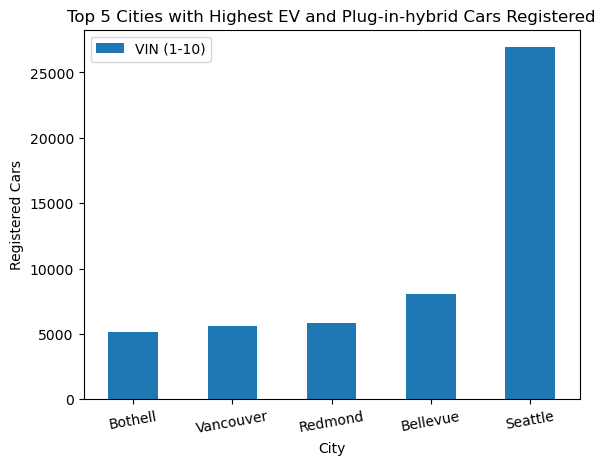

In [15]:
# Bar chart for Top 5 Cities with Highest EV and Plug-in-hybrid Cars Registered

# Filter the DataFrame
top_cities = cities_df[cities_df['VIN (1-10)'] > 5000]

# Select the 'City' and 'VIN (1-10)' columns for plotting
top_cities = top_cities[['City', 'VIN (1-10)']]

# Plot the data
top_cities.plot(x='City', y='VIN (1-10)', kind='bar')

# Set plot labels and rotation
plt.xlabel('City')
plt.xticks(rotation=10)
plt.ylabel('Registered Cars')
plt.title('Top 5 Cities with Highest EV and Plug-in-hybrid Cars Registered')

#save the plot
plt.savefig("output_data/Top_5_Cities.png")

# Show the plot
plt.show()

In [16]:
# Coutning chargers in near each city

chargers_df = charging_data_df.groupby(['near']).count()['name'].reset_index().sort_values(by="near").tail(5)
chargers_df

,near,name
0,"Bellevue, WA, USA",85
1,"Bothell, WA, USA",88
2,"Redmond, WA, USA",87
3,"Seattle, WA, USA",73
4,"Vancouver, WA, USA",82


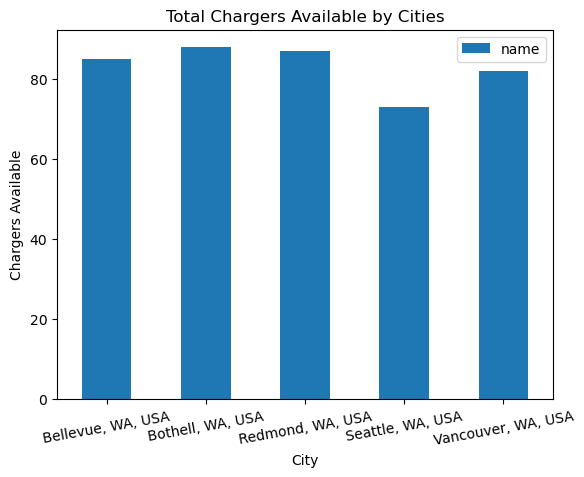

In [17]:
# Bar chart for Total Chargers Available by Cities

# Plot the data
chargers_df.plot(x='near', y='name', kind='bar', align='center')

# Set plot labels and rotation
plt.xlabel('City')
plt.xticks(rotation=10)
plt.ylabel('Chargers Available')
plt.title('Total Chargers Available by Cities')
frame_width = 800,
frame_height = 700,

#save the plot
plt.savefig("output_data/Total_Chargers_Available_by_Cities.png")

# Show the plot
plt.show()

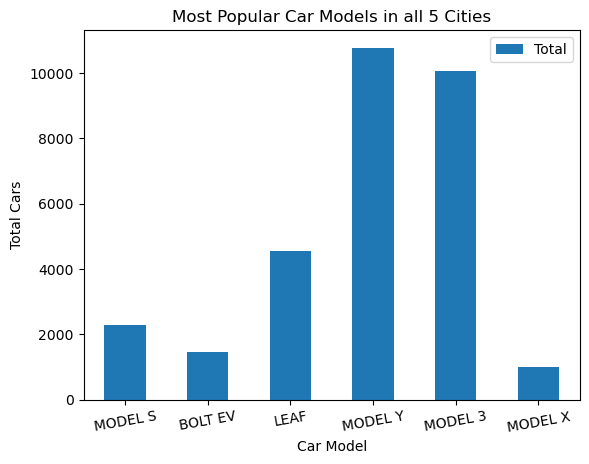

In [18]:
# Bar chart for Most Popular Car Models in all 5 Cities

# Plot the data
merged_df_five_cities.plot(x='Model', y='Total', kind='bar', align='center')

# Set plot labels and rotation
plt.xlabel('Car Model')
plt.xticks(rotation=10)
plt.ylabel('Total Cars')
plt.title('Most Popular Car Models in all 5 Cities')
frame_width = 800,
frame_height = 700,

#save the plot
plt.savefig("output_data/Total_Chargers_Available_by_Cities.png")

# Show the plot
plt.show()

In [19]:
# Merging Tax Incentives with top 5 cities 

tax_rebate_top_models = pd.merge(merged_df_five_cities, rename_tax_rebate, on=['Make', 'Model'], how='left')
tax_rebate_top_models

,Make,Model,VIN (1-10),VIN (1-10)_Bothell,VIN (1-10)_Vancouver,VIN (1-10)_Redmond,VIN (1-10)_Bellevue,Total,curent_model-year,vehicle_type,tax_credit_amount,msrp_limit
0,TESLA,MODEL S,1045.0,179.0,246.0,288.0,538.0,2296.0,NaN,NaN,NaN,NaN
1,CHEVROLET,BOLT EV,1256.0,NaN,218.0,NaN,NaN,1474.0,2024.0,EV,7500.0,55000.0
2,NISSAN,LEAF,2694.0,375.0,520.0,464.0,511.0,4564.0,2023.0,EV,7500.0,55000.0
3,TESLA,MODEL Y,4447.0,1701.0,837.0,1625.0,2157.0,10767.0,2023.0,EV,7500.0,80000.0
4,TESLA,MODEL 3,4874.0,1060.0,953.0,1328.0,1829.0,10044.0,2023.0,EV,7500.0,55000.0
5,TESLA,MODEL X,NaN,208.0,NaN,292.0,497.0,997.0,NaN,NaN,NaN,NaN


In [20]:
#Extracting Tax Incentive per popular car model

selected_columns = ['Make', 'Model', 'tax_credit_amount', 'msrp_limit']
tax_rebate_per_model_compressed_df = tax_rebate_top_models[selected_columns]
tax_rebate_per_model_compressed_df

,Make,Model,tax_credit_amount,msrp_limit
0,TESLA,MODEL S,NaN,NaN
1,CHEVROLET,BOLT EV,7500.0,55000.0
2,NISSAN,LEAF,7500.0,55000.0
3,TESLA,MODEL Y,7500.0,80000.0
4,TESLA,MODEL 3,7500.0,55000.0
5,TESLA,MODEL X,NaN,NaN


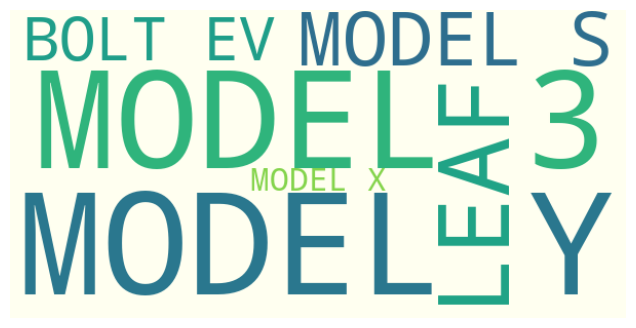

In [21]:
#WORDCLOUD showing top 6 popular car models for all top 5 cities

#Group by 'Model' and sum the 'Total' values
model_totals = merged_df_five_cities.groupby('Model')['Total'].sum().reset_index()

# Convert the data to a dictionary for word cloud
model_totals_dict = dict(zip(model_totals['Model'], model_totals['Total']))

# Generate a word cloud
wordcloud = WordCloud(width=600, height=300, background_color='ivory').generate_from_frequencies(model_totals_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels

#Save the plot
plt.savefig("output_data/WordCloud.png")

#Show Plot
plt.show()